# 02 Multitemporal SAR composites using the Orfeo Toolbox

With the goal to better identify the decorrelation areas related to the lava flow, the InSAR coherence image is
combined with the master (pre event) and slave (post event) SAR detected amplitude images to create an ad-hoc color
composite, also referred to as Multi-Temporal Coherent (MTC) color composite. 

Accordingly, MTC product is generated combining into an RGB image:

* the SAR detected amplitude of the master SAR acquisition (Red channel)
* the SAR detected amplitude of the slave SAR acquisition (Green channel)
* the SAR interferometric coherence (Blue channel).

In [1]:
%matplotlib inline
import sys
import os
sys.path.append('/opt/OTB-6.2.0/lib/python')
os.environ['OTB_APPLICATION_PATH'] = '/opt/OTB-6.2.0/lib/otb/applications'
os.environ['LD_LIBRARY_PATH'] = '/opt/OTB-5.10.0/lib'
os.environ['ITK_AUTOLOAD_PATH'] = '/opt/OTB-6.2.0/lib/otb/applications'
import otbApplication
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings("ignore")

In [2]:
base_path = 'https://store.terradue.com/api/dlr-insarql-hr/production/2017/06/21/S1A_IW_SLC__1SDV_20170613T114204_20170613T114231_017015_01C561_53A9_S1B_IW_SLC__1SDV_20170619T114124_20170619T114154_006119_00ABFC_8442'

In [3]:
url_master = '/vsicurl/%s/%s' % ( base_path, 'GEO_AMPL_CAL_QL_MASTER.tiff')
url_slave = '/vsicurl/%s/%s' % ( base_path, 'GEO_AMPL_CAL_QL_SLAVE.tiff')
url_coherence = '/vsicurl/%s/%s' % ( base_path, 'GEO_DCOHER.tiff' )

urls_input = [ url_master, url_slave, url_coherence]

In [4]:
ulx = 4973
uly = 4747
lrx = 5829
lry = 5280

startx = ulx 
starty = uly

sizex = lrx - ulx + 1 
sizey = lry - uly + 1

print(sizex, sizey)

(857, 534)


In [5]:
results = []

for index, item in enumerate(urls_input, start = 0):
    app = otbApplication.Registry.CreateApplication("ExtractROI")
    app.SetParameterString('in', item)
    app.SetParameterString('in', item)
    app.SetParameterString('mode', 'extent')
    app.SetParameterFloat('mode.extent.ulx', ulx)
    app.SetParameterFloat('mode.extent.uly', uly)
    app.SetParameterFloat('mode.extent.lrx', lrx)
    app.SetParameterFloat('mode.extent.lry', lry)
    app.SetParameterInt('startx', startx)
    app.SetParameterInt('starty', starty)
    app.SetParameterInt('sizex', sizex)
    app.SetParameterInt('sizey', sizey)
    app.Execute()

    result = app.GetVectorImageAsNumpyArray("out")
    band = np.ndarray(shape=(sizey, sizex, 1), dtype=np.float32)
    band[..., 0] = result[:,:,1]
    results.append(band)

In [6]:
img = np.dstack((results[0], results[1], results[2]))

In [7]:
lon = 98.3755246
lat = 3.1696344

extent = 0.2

x_min = lon - extent
y_min = lat - extent
x_max = lon + extent
y_max = lat + extent

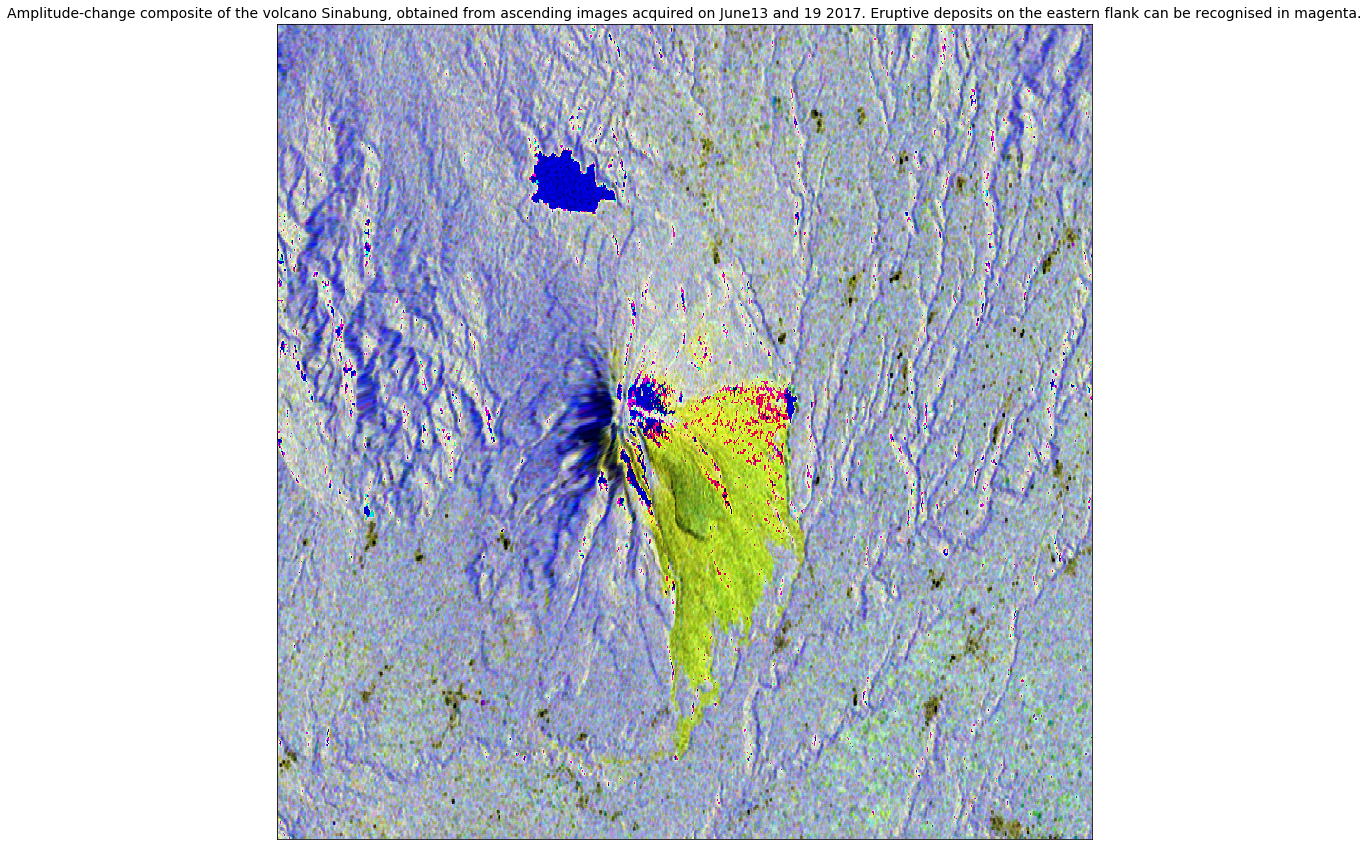

In [8]:
fig = plt.figure(figsize=(15,15))  
ax = fig.add_subplot(1, 1, 1)  
ax.set_title('Amplitude-change composite of the volcano Sinabung, obtained from ascending images acquired on June13 and 19 2017. Eruptive deposits on the eastern flank can be recognised in magenta.', fontsize=14)

map = Basemap(projection = 'merc',
              llcrnrlat = y_min,
              urcrnrlat = y_max,
              llcrnrlon = x_min,
              urcrnrlon = x_max,
              resolution='i',
              ax=ax)

map.imshow(img, origin='upper', ax=ax)
map.drawcountries(color='blue', linewidth=1.5, ax=ax)
map.drawcoastlines(linewidth=1.5, color='red', ax=ax)

In [9]:
img = np.dstack((results[0], results[1], results[1]))

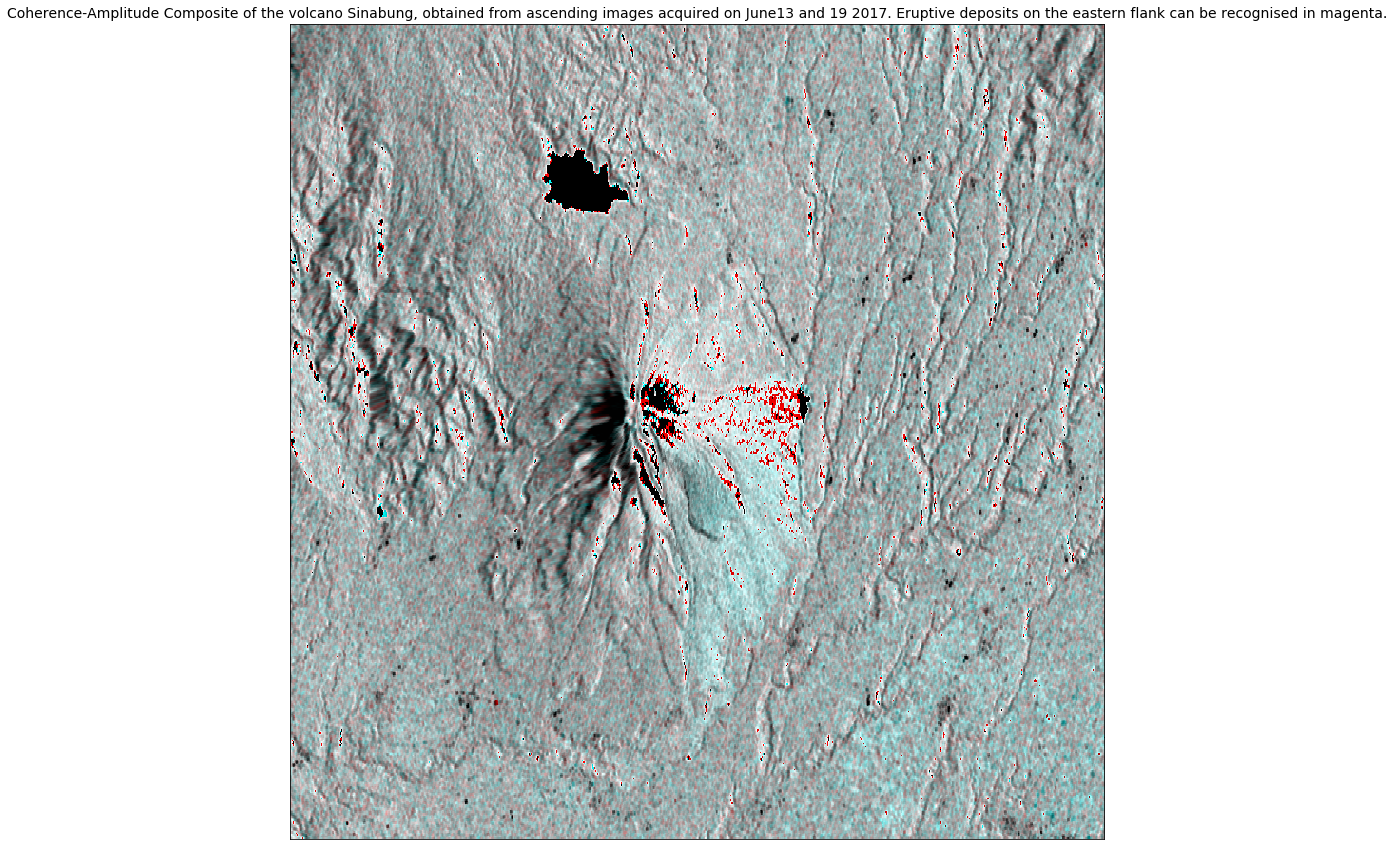

In [10]:
fig = plt.figure(figsize=(15,15))  # a new figure window
ax = fig.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)
ax.set_title('Coherence-Amplitude Composite of the volcano Sinabung, obtained from ascending images acquired on June13 and 19 2017. Eruptive deposits on the eastern flank can be recognised in magenta.', fontsize=14)

map = Basemap(projection = 'merc',
              llcrnrlat = y_min,
              urcrnrlat = y_max,
              llcrnrlon = x_min,
              urcrnrlon = x_max,
              resolution='i',
              ax=ax)

map.imshow(img, origin='upper', ax=ax)
map.drawcountries(color='blue', linewidth=1.5, ax=ax)
map.drawcoastlines(linewidth=1.5, color='red', ax=ax)